In [1]:
cd /content/drive/MyDrive/Nikhil Projects/loan eligibility prediction

/content/drive/MyDrive/Nikhil Projects/loan eligibility prediction


# Table Of Contents
- ## <a href='#1'>1. Importing Libraries and Dataset </a> 
- ## <a href='#2'>2. Data </a> 
- ## <a href='#3'>3.Exploratory Data Analysis </a> 
- ### <a href='#4'>3.1 Describe Function  </a> 
- ### <a href='#5'>3.2 Missing Value </a>
- ### <a href='#6'>3.3 Questions </a> 
- ## <a href='#7'>4.Gender  </a> 
- ## <a href='#8'>5.Marriage   </a>
- ## <a href='#9'>6.Education  </a>
- ## <a href='#10'>7.Self Employed  </a>
- ## <a href='#11'>8.Applicant Income </a>
- ## <a href='#12'>9.Location Of The Houses </a>
- ## <a href='#13'>10.Credit History </a>
- ## <a href='#14'>11.Loan Status </a>
- ## <a href='#15'>12.Correlation Matrix </a>
- ## <a href='#16'>13.Dependents  </a> 
- ## <a href='#17'>14.Summary Conclusion </a>

# <a id='1'> 1. Importing Libraries and Dataset</a>

In [2]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# <a id='2'> 2.Data </a>

## Data Columns Means
Loan_ID --------------> Unique Loan ID. <br>
Gender --------------> Male/ Female (cinsiyet) <br>
Married --------------> Applicant married (medeni hali) (Y/N) <br>
Dependents ------------> Number of dependents (bakması gereken kişi sayısı) <br>
Education -------------> Applicant Education  (egitim durumu) (Graduate/ Under Graduate) <br>
Self_Employed ---------> Self-employed (kendi işinde çalışan) (Y/N) <br>
ApplicantIncome -------> Applicant income  (basvuru yapanın geliri)<br>
CoapplicantIncome -----> Coapplicant income (basvuru yapanın eşinin geliri) <br>
LoanAmount -----------> Loan amount in thousands (1 bin karsı odeditleri miktar) <br>
Loan_Amount_Term ------> Term of a loan in months ( kaç aylık ) <br>
Credit_History --------> Credit history meets guidelines (kredi gecmişi kosuları saglıyor mu,kara liste  ) <br>
Property_Area ---------> Urban/ Semi-Urban/ Rural (evlerin mekanları) <br>
Loan_Status -----------> Loan approved (Y/N) (kredi onay) <br>

In [3]:
df=pd.read_csv("loan-train.csv")

df_train=df.copy()
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# <a id='3'> 3.Exploratory Data Analysis</a>

* Exploratory Data Analysis refers to the critical process of performing 
initial investigations on data so as to discover patterns,to spot anomalies, 
to test hypothesis and to check assumptions with
the help of summary statistics and graphical representations. <br>

* Your goal during EDA is to develop an understanding of your data. The easiest way to do this is to use questions as tools to guide your investigation. When you ask a question, the question focuses your attention on a specific part of your dataset and helps you decide which graphs, models, or transformations to make.<br>

* Generate questions about your data.<br>

* Search for answers by visualising, transforming, and modelling your data. <br>

* Let's start exploring our data

In [4]:
# Size Of Data Set
df_train.shape

(614, 13)

* Dataset comprises of 614 observations and 13 characteristics.<br>
* Out of which one is dependent variable and rest 12 are independent variables <br>

In [5]:
# Columns Names
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Columns Types
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* Data has only float,object and integer values.<br>
* Variable column has null/missing values. <br>

In [8]:
# Duplicated data
df_train[df_train.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


* We don't have duplicated data 


# <a id='4'> 3.1 Describe Function</a>

* Generate descriptive statistics.<br>
* Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.<br>
* The **describe**() function in pandas is very handy
in getting various **summary statistics**.<br>
* This function returns the **count**, **mean**, **standard deviation**,
**minimum** and **maximum** **values** and the **quantiles of the data**.<br>

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# <a id='5'> 3.2 Missing Value</a>

* Missing data is a big topic, I'll try to explain it at another time. <br>
* In this project, I will remove all of the missing data from the data set. <br>

In [10]:
df_train.isnull().values.any()

True

In [11]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df_train)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [13]:
df_train_clean=df_train.copy()
df_train_clean=df_train_clean.dropna()
df_train_clean.drop(['Loan_ID'],inplace=True,axis=1)
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [14]:
# Unique Value
{column: list(df_train_clean[column].unique()) for column in df_train_clean.select_dtypes('object').columns[2:]}

{'Dependents': ['1', '0', '2', '3+'],
 'Education': ['Graduate', 'Not Graduate'],
 'Loan_Status': ['N', 'Y'],
 'Property_Area': ['Rural', 'Urban', 'Semiurban'],
 'Self_Employed': ['No', 'Yes']}

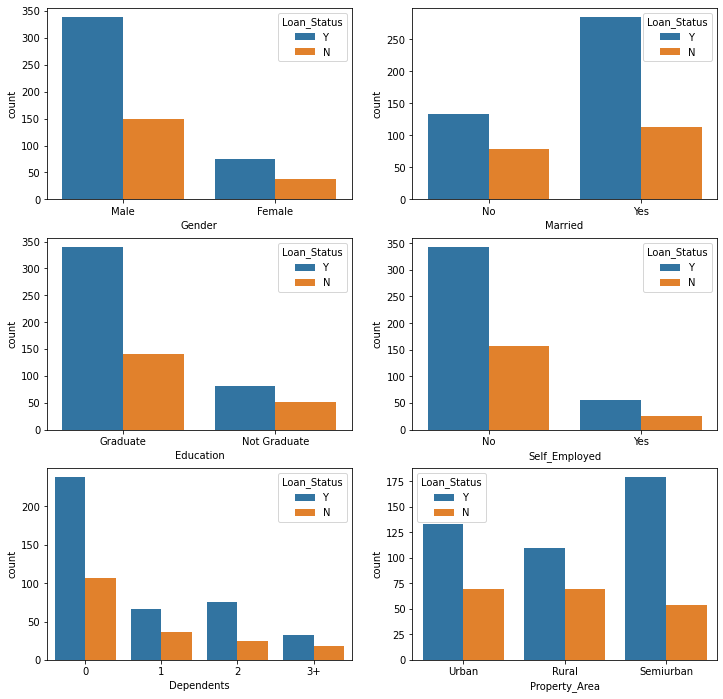

In [63]:
groups = ['Gender','Married','Education','Self_Employed','Dependents','Property_Area']
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.countplot(x = group, hue = 'Loan_Status',ax=axs[i], data=df)

We can see that people who haven't graduated are far less likely to have their loans approved, also there exists a biad towards married couples over those who haven't married

**Are there disparities in how large a loan different groups take out?**

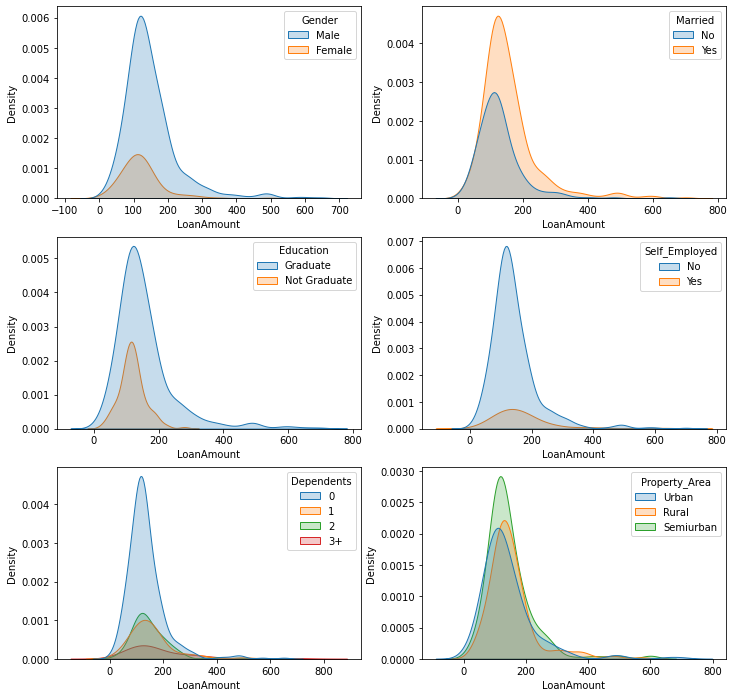

In [64]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.kdeplot(x = 'LoanAmount' , hue = group,ax=axs[i], data=df, fill=True)

Things to notice:

- Far more men take out loans than women, likewise with education level
- Most distributions are similar; most demographics will take out similar sized loans (between 100 and 200 thousand dollars)
- The exception to this ^ is that married couples are more likely to take out higher loands than non-married couples. This is likely due to the phenomena of married couples settling down and taking out a mortgage

**Disparities in income?**

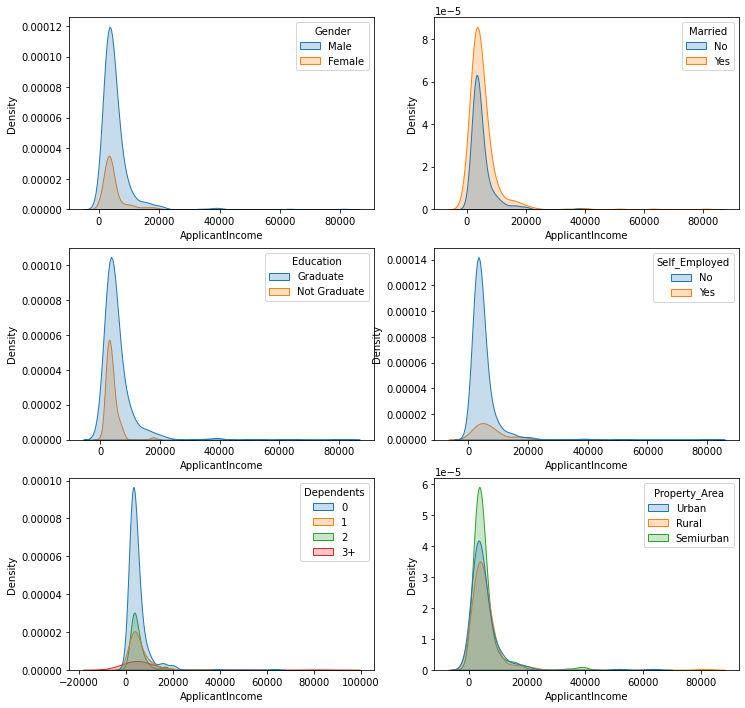

In [65]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.kdeplot(x = 'ApplicantIncome' , hue = group,ax=axs[i], data=df, fill=True)

Nothing particularly noticeable here

Look at continuous variables. First we will fill na values with the mean of each respective column

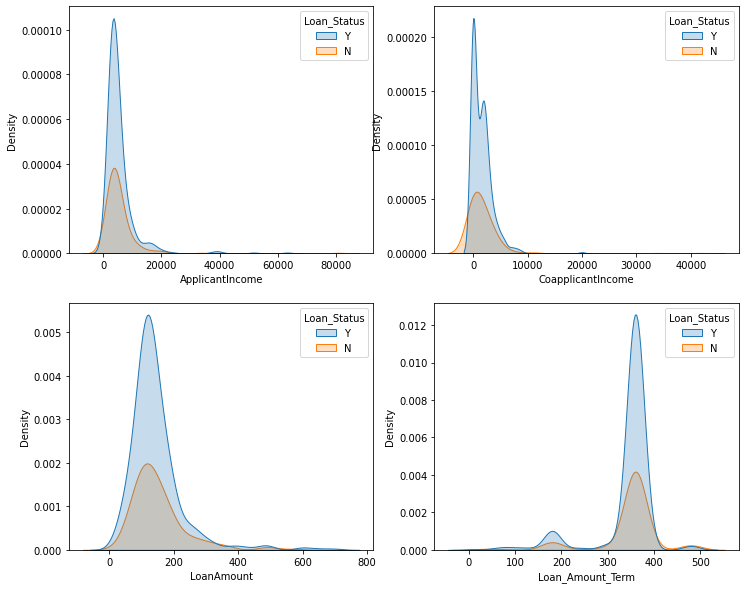

In [66]:
cont = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
fig, ax = plt.subplots(2,2, figsize = (12,10))
axs=ax.ravel()
for i, continuous_group in enumerate(cont):
    sns.kdeplot(x = continuous_group, hue = 'Loan_Status', ax = axs[i], data = df, fill = True)

Overall differences are quite subtle however there are a couple of things to note:

- Applicant and coapplicant income show slightly fatter left-tails for rejected loans than for accepted loans as expected
- The loans that are rejected have a more concentrated loan amount value than loans that are accepted

# <a id='6'> 3.3 Questions</a>
* Generate questions about your data.
* Find answer and visualize it.make inferences
* Q1.How is the gender distribution?
* Q2.How is the marriage distribution?
* Q3.How is the distribution of marriage by gender?
* Q4.How is the education distribution?
* Q5.How is the distribution of education by gender,marriage?
* Q6.How is the self employed distribution?
* Q7.How is the distribution of self employed by gender?
* Q8.How is the  applicant income distribution? 
* Q9.How much is the average,min,max applicant income?
* Q9.How much is the average,min,max applicant income by self employed?
* Q10.How is the location of the houses? 
* Q11.How much is the income of the applicants distributed according to the location of the houses?
* Q12.How much is the Loan Amount of the applicants distributed according to the location of the houses?
* Q13.How is the Credit History Distribution ?
* Q14.How does the credit history relate to applicant income,loan amount,loan amount term?(min,max mean)
* Q15.How is the Credit History Distribution ?
* Q16.How does the credit history relate to applicant income,loan amount,loan amount term?(min,max mean)
* .....

## <a id='7'> 4.Gender </a>

* How is the gender distribution? <br>


In [15]:
df_gender=df_train_clean['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})


fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'], pull=[0,0.2],hole=0.4)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [16]:
df_gender=df_train_clean['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})


fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [17]:
df_gender=df_train_clean['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})

fig = go.Figure(go.Bar(
    x=df_gender['Gender'],y=df_gender['count'],
    marker={'color': df_gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

**Conclude Q1**
* Most of the people who apply are men.<br>
* We will work in an area where men are dominant. <br>


## <a id='8'> 5.Married </a>
* How is the marriage distribution? <br>
* How is the distribution of marriage by gender? <br>

In [18]:
df_Married=df_train_clean['Married'].value_counts().to_frame().reset_index().rename(columns={'index':'Married','Married':'count'})


fig = go.Figure([go.Pie(labels=df_Married['Married'], values=df_Married['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Married Count",title_x=0.5)
fig.show()

In [19]:
df_M_and_G=df_train_clean.groupby(by =['Gender','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'Count'})
df_M_and_G

fig = px.bar(df_M_and_G, x="Married", y="Count",color="Gender",barmode="group",)

fig.update_layout(title_text='Married Count With Gender',title_x=0.5,)

fig.show()

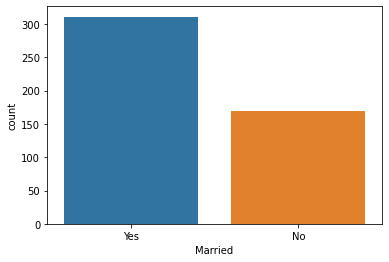

In [20]:
ax = sns.countplot(x="Married", data=df_train_clean)

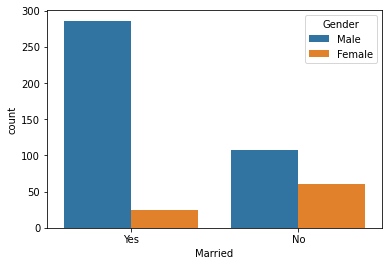

In [21]:
ax = sns.countplot(x="Married",hue="Gender", data=df_train_clean)

## Conclusion 2 
* More than half of the people are married <br>
* The marriage rate for men is 72% <br>
* The marriage rate for women is 30% <br>

## <a id='9'> 6.Education </a>
* How is the Education distribution? <br>
* How is the distribution of education by gender,marriage? <br>

In [22]:
df_Education=df_train_clean['Education'].value_counts().to_frame().reset_index().rename(columns={'index':'Education','Education':'count'})


fig = go.Figure([go.Pie(labels=df_Education['Education'], values=df_Education['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Education Count",title_x=0.5)
fig.show()

In [23]:
df_M_and_G_and_E=df_train_clean.groupby(by =['Gender','Education','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Married", barmode="group",
             facet_col="Education"
             )
fig.update_layout(title_text='Education Count With Gender,Married',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",)
                  )

fig.show()

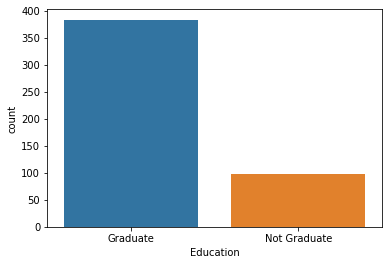

In [24]:
ax = sns.countplot(x="Education", data=df_train_clean)

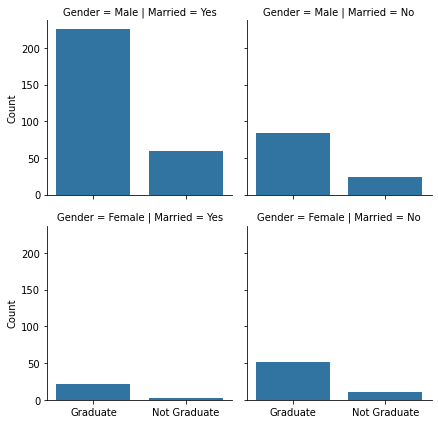

In [25]:
g = sns.FacetGrid(df_train_clean, col="Married", row="Gender")
g.map_dataframe(sns.countplot, x="Education")
g.set_axis_labels(" ", "Count");

## Conclusion 3
* Education rate in people 80% <br>
* The education rate for men is 78% <br>
* The education rate for women is 84% <br>

## <a id='10'> 7.Self Employed </a>
* How is the Self Employed distribution? <br>
* How is the distribution of education by gender? <br>

In [26]:
df_Self_Employed=df_train_clean['Self_Employed'].value_counts().to_frame().reset_index().rename(columns={'index':'Self_Employed','Self_Employed':'count'})

fig = go.Figure([go.Pie(labels=df_Self_Employed['Self_Employed'], values=df_Self_Employed['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Self Employed Count",title_x=0.5)
fig.show()

In [27]:
df_M_and_G_and_E=df_train_clean.groupby(by =['Gender','Self_Employed'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Self_Employed':'Self_Employed','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Self_Employed", barmode="group")

fig.update_layout(title_text='Self Employed Count With Gender',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell"                             
     )
  )

fig.show()

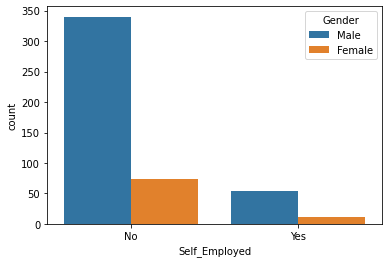

In [28]:
ax = sns.countplot(x="Self_Employed",hue="Gender", data=df_train_clean)

## Conclusion 4 
* Self Employed rate in people 14%
* self Employed rate in for men 14%
* self Employed rate in for women 14%

## <a id='11'> 8.Applicant Income </a>
* How is the  applicant income distribution? <br>
* How much is the average,min,max applicant income?<br>
* How much is the average,min,max applicant income by self employed?<br>

In [29]:
df_train_clean.ApplicantIncome.describe().T

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [30]:
fig = go.Figure(data=[go.Histogram(x=df_train_clean['ApplicantIncome'],  # To get Horizontal plot ,change axis - 
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, #start range of bin
                      end=25000,  #end range of bin
                      size=1000   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Applicant Income",xaxis_title="Applicant Income",yaxis_title="Counts",title_x=0.5)
fig.show()

In [31]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_train_clean['ApplicantIncome'],
    marker_color='royalblue',
    boxmean=True # represent mean
))
fig.update_layout(title_text='Applicant Income',yaxis_title="Count",title_x=0.5)
fig.show()

In [32]:
fig = px.box(df_train_clean, x="Self_Employed", y="ApplicantIncome")
fig.update_layout(title_text='Applicant Income With Self Employed',xaxis_title="Self Employed",yaxis_title="Applicant Income",title_x=0.5)
fig.show()

In [33]:
# Multiple Bullet

min_income=df_train_clean.ApplicantIncome.min()

max_income=df_train_clean.ApplicantIncome.max()

mean_income=df_train_clean.ApplicantIncome.mean()


fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  min_income,
    domain = {'x': [0.25, 1], 'y': [0.4, 0.5]},
    title = {'text': "Min Income",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 200]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = max_income,
    domain = {'x': [0.25, 1], 'y': [0.6, 0.7]},
    title = {'text': "Max Income",'font':{'color': 'black','size':15}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,100500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = mean_income,
    domain = {'x': [0.25, 1], 'y': [0.8, 0.9]},
    title = {'text' :"Mean Income",'font':{'color': 'black','size':15}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "darkblue"}}
))

fig.update_layout(title="Applicant Income Statistics ",title_x=0.5)
fig.show()

In [34]:
SE_Y_income=df_train_clean[df_train_clean["Self_Employed"]=="Yes"]
SE_N_income=df_train_clean[df_train_clean["Self_Employed"]=="No"]


minY_income=SE_Y_income.ApplicantIncome.min()

maxY_income=SE_Y_income.ApplicantIncome.max()

meanY_income=SE_Y_income.ApplicantIncome.mean()

minN_income=SE_N_income.ApplicantIncome.min()

maxN_income=SE_N_income.ApplicantIncome.max()

meanN_income=SE_N_income.ApplicantIncome.mean()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  minY_income,
    domain = {'x': [0.25, 1], 'y': [0.05, 0.15]},
    title = {'text': "Self Employed Min Income ",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 1500]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxY_income,
    domain = {'x': [0.25, 1], 'y': [0.22, 0.32]},
    title = {'text': "Self Employed Max Income",'font':{'color': 'black','size':12}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,42500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanY_income,
    domain = {'x': [0.25, 1], 'y': [0.39, 0.49]},
    title = {'text' :"Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,8000]},
        'bar': {'color': "darkblue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = minN_income,
    domain = {'x': [0.25, 1], 'y': [0.55, 0.65]},
    title = {'text' :"Not Self Employed Min Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,200]},
        'bar': {'color': "darkcyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxN_income,
    domain = {'x': [0.25, 1], 'y': [0.72,0.82]},
    title = {'text' :"Not Self Employed Max Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,90000]},
        'bar': {'color': "red"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanN_income,
    domain = {'x': [0.25, 1], 'y': [0.88,0.98]},
    title = {'text' :"Not Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Self Employed And Not Self Employed Applicant Income Statistics ",title_x=0.5)
fig.show()

## Conclusion 5

* Min Income =150
* Max Income =81k
* Mean Income =5350
* Self Employed Min Income =1000
* Self Employed Max Income =39.1k
* Self Employed Mean Income =7790
* Employed Min Income =150
* Employed Max Income =81k
* Employed Mean Income =4980

## <a id='12'> 9.Location Of The Houses </a>
* How is the location of the houses? <br>
* How much is the income of the applicants distributed according to the location of the houses?<br>
* How much is the Loan Amount of the applicants distributed according to the location of the houses?<br>

In [35]:
df_Property_Area=df_train_clean['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})

fig = go.Figure(data=[go.Scatter(
    x=df_Property_Area['Property_Area'], y=df_Property_Area['count'],
    mode='markers',
    marker=dict(
        color=df_Property_Area['count'],
        size=df_Property_Area['count']*0.3, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Property Area',xaxis_title="Property Area ",yaxis_title="Number Of Property ",title_x=0.5)
fig.show()

In [36]:
df_Property_Area=df_train_clean['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})

colors=['cyan','darkblue',"darkcyan"]

fig = go.Figure([go.Pie(labels=df_Property_Area['Property_Area'], values=df_Property_Area['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Property Area Count",title_x=0.5)
fig.show()

In [37]:
df_Property_Area=df_train_clean['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})


fig = go.Figure(go.Bar(
    x=df_Property_Area['Property_Area'],y=df_Property_Area['count'],
    marker={'color': df_Property_Area['count'], 
    'colorscale': 'Viridis'},  
    text=df_Property_Area['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Property Area Count',xaxis_title="Property Area",yaxis_title="Number Of Property ",title_x=0.5)
fig.show()

In [38]:
df_PA_mean=df_train_clean.groupby(by =['Property_Area'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','ApplicantIncome':'mean'})
df_PA_min=df_train_clean.groupby(by =['Property_Area'])['ApplicantIncome'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','ApplicantIncome':'min'})
df_PA_max=df_train_clean.groupby(by =['Property_Area'])['ApplicantIncome'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','ApplicantIncome':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Applicant Income",
                                   "Min Applicant Income",
                                   "Max  Applicant Income"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Applicant Income",title_x=0.5)
fig.show()

In [39]:
df_PA=df_train_clean.groupby(by =['Property_Area'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','ApplicantIncome':'mean'})

fig = go.Figure(go.Bar(
    x=df_PA['Property_Area'],y=df_PA['mean'],
    marker={'color': df_PA['mean'], 
    'colorscale': 'twilight'},  
    text=df_PA['mean'],
    textposition = "outside",
))
fig.update_layout(title_text='Property Area With Applicant Mean Income',xaxis_title="Property Area",yaxis_title="Applicant Income",title_x=0.5)
fig.show()

In [40]:
df_PA_mean=df_train_clean.groupby(by =['Property_Area'])['LoanAmount'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','LoanAmount':'mean'})
df_PA_min=df_train_clean.groupby(by =['Property_Area'])['LoanAmount'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','LoanAmount':'min'})
df_PA_max=df_train_clean.groupby(by =['Property_Area'])['LoanAmount'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','LoanAmount':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount",
                                   "Min Loan Amount",
                                   "Max  Loan Amount"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'curl'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'curl'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'curl'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Loan Amount",title_x=0.5)
fig.show()

In [41]:
fig = px.scatter(df_train_clean, x='ApplicantIncome', y='LoanAmount',color="Property_Area")
fig.update_layout(title='Applicant Income Vs Loan Amount With Property Area ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

## **Conclusion** 6

* Number of houses in **Semiurban** Area:191 
* Number of houses in **Rural** Area:139 
* Number of houses in **Urban** Area:150
<br>
<br>
* Applicant Income with **Rural** Area
* **mean**=5764,**min**=150, **max**=81000
* Applicant Income with **Semiurban** Area 
* **mean**=5368,**min**=1500, **max**=39999
* Applicant Income with **Urban** Area
* **mean**=4988,**min**=1000, **max**=18333
<br>
<br>
* Loan Amount with **Semiurban** Area:
* **mean**=146,**min**=25, **max**=600
* Loan Amount with **Rural** Area:
* **mean**=155,**min**=40, **max**=570
* Loan Amount with **Urban** Area:
* **mean**=132,**min**=9, **max**=500
<br>
<br>
* Loan Amount Term with **Semiurban** Area:
* **mean**=344,**min**=36, **max**=480
* Loan Amount Term with **Rural** Area:
* **mean**=345,**min**=84, **max**=480
* Loan Amount Term with **Urban** Area:
* **mean**=336,**min**=60, **max**=480

## <a id='13'> 10.Credit History </a>
* How is the Credit History Distribution ?
* How does the credit history relate to applicant income,loan amount,loan amount term?(min,max mean) <br>


In [42]:
df_C_H=df_train_clean['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})


fig = go.Figure([go.Pie(labels=df_C_H['Credit_History'], values=df_C_H['count'],pull=[0,0.3])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Credit History Count ",title_x=0.5)
fig.show()

In [43]:
df_C_H=df_train_clean['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})

fig = go.Figure(go.Bar(
    x=df_C_H['Credit_History'],y=df_C_H['count'],
    marker={'color': df_C_H['count'], 
    'colorscale': 'Viridis'},  
    text=df_C_H['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Credit History Distribution',xaxis_title="Result",yaxis_title="Count ",title_x=0.5)
fig.show()

In [44]:
df_CH_mean=df_train_clean.groupby(by =['Credit_History'])['Loan_Amount_Term'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','Loan_Amount_Term':'mean'})
df_CH_min=df_train_clean.groupby(by =['Credit_History'])['Loan_Amount_Term'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','Loan_Amount_Term':'min'})
df_CH_max=df_train_clean.groupby(by =['Credit_History'])['Loan_Amount_Term'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','Loan_Amount_Term':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount Term",
                                   "Min Loan Amount Term",
                                   "Max  Loan Amount Term"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Loan Amount Term",title_x=0.5)
fig.show()

In [45]:
df_CH_mean=df_train_clean.groupby(by =['Credit_History'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','ApplicantIncome':'mean'})
df_CH_min=df_train_clean.groupby(by =['Credit_History'])['ApplicantIncome'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','ApplicantIncome':'min'})
df_CH_max=df_train_clean.groupby(by =['Credit_History'])['ApplicantIncome'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','ApplicantIncome':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Applicant Income",
                                   "Min Applicant Income",
                                   "Max  Applicant Income"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Applicant Income",title_x=0.5)
fig.show()

In [46]:
df_CH_mean=df_train_clean.groupby(by =['Credit_History'])['LoanAmount'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','LoanAmount':'mean'})
df_CH_min=df_train_clean.groupby(by =['Credit_History'])['LoanAmount'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','LoanAmount':'min'})
df_CH_max=df_train_clean.groupby(by =['Credit_History'])['LoanAmount'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','LoanAmount':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount ",
                                   "Min Loan Amount ",
                                   "Max  Loan Amount "))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Loan Amount ",title_x=0.5)
fig.show()

## **Conclusion** 7

* 85 percent of accepted applications have a positive credit history


## <a id='14'> 11.Loan Status </a>
* How is the Loan Status Distribution ?
* How is the Loan Status Distribution with credit history?

In [47]:
df_L_S=df_train_clean['Loan_Status'].value_counts().to_frame().reset_index().rename(columns={'index':'Loan_Status','Loan_Status':'count'})


fig = go.Figure([go.Pie(labels=df_L_S['Loan_Status'], values=df_L_S['count'],pull=[0,0.2])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Loan Status Count ",title_x=0.5)
fig.show()

In [48]:
df_L_S=df_train_clean['Loan_Status'].value_counts().to_frame().reset_index().rename(columns={'index':'Loan_Status','Loan_Status':'count'})

fig = go.Figure(go.Bar(
    x=df_L_S['Loan_Status'],y=df_L_S['count'],
    marker={'color': df_L_S['count'], 
    'colorscale': 'Viridis'},  
    text=df_L_S['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Loan Status Distribution',xaxis_title="Result",yaxis_title="Count ",title_x=0.5)
fig.show()

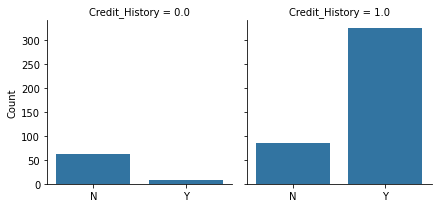

In [49]:
g = sns.FacetGrid(df_train_clean, col="Credit_History",)
g.map_dataframe(sns.countplot, x="Loan_Status")
g.set_axis_labels(" ", "Count");

In [50]:
df_M_and_G_and_E=df_train_clean.groupby(by =['Loan_Status','Property_Area'])['Dependents'].count().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','Loan_Status':'Loan_Status','Dependents':'count'})
fig = px.bar(df_M_and_G_and_E, x="Property_Area", y="count", color="Loan_Status", barmode="group",
             
             )
fig.update_layout(title_text='Loan Status With Property Area',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.update_layout(xaxis_title="Property Area",yaxis_title="Count")
fig.show()

In [51]:
df_M_and_G_and_E=df_train_clean.groupby(by =['Loan_Status','Education'])['Dependents'].count().to_frame().reset_index().rename(columns={'Education':'Education','Loan_Status':'Loan_Status','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Loan_Status", y="count", color="Education", barmode="group",
             
             )
fig.update_layout(title_text='Loan Status With Education ',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.update_layout(xaxis_title="Education",yaxis_title="Count")
fig.show()

In [52]:
fig = px.scatter(df_train_clean, x='ApplicantIncome', y='LoanAmount',color="Loan_Status")
fig.update_layout(title='Applicant Income Vs Loan Amount With Loan Status ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

## **Conclusion** 8

* Rate of accepted applications 70 meaning that the data set is unbalanced


## <a id='15'> 12.Correlation Matrix </a>

* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.<br>
* A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.<br>

* **There are three broad reasons for computing a correlation matrix** <br>

* To summarize a large amount of data where the goal is to see patterns. <br>

* To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise. <br>

* As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.<br>

In [53]:
df_CM_train=df_train_clean.copy()

In [54]:
Gender_map= {'Male':0,'Female':1}
Married_map= {'Yes':1,'No':0}
Education_map= {'Graduate':1,'Not Graduate':0}
Self_Employed_map= {'Yes':1,'No':0}
Dependents_map= {'0':0,'1':1,'2':2,'3+':3}
Loan_Status_map= {'Y':1,'N':0}
Rural_map={'Rural':1,'Urban':0,'Semiurban':0}
Urban_map={'Rural':0,'Urban':1,'Semiurban':0}
Semiurban_map={'Rural':0,'Urban':0,'Semiurban':1}

In [55]:
df_CM_train["Gender"]=df_CM_train["Gender"].map(Gender_map)
df_CM_train["Married"]=df_CM_train["Married"].map(Married_map)
df_CM_train["Education"]=df_CM_train["Education"].map(Education_map)
df_CM_train["Dependents"]=df_CM_train["Dependents"].map(Dependents_map)
df_CM_train["Self_Employed"]=df_CM_train["Self_Employed"].map(Self_Employed_map)
df_CM_train["Loan_Status"]=df_CM_train["Loan_Status"].map(Loan_Status_map)
df_CM_train["Rural_Area"]=df_CM_train["Property_Area"].map(Rural_map)
df_CM_train["Urban_Area"]=df_CM_train["Property_Area"].map(Urban_map)
df_CM_train["Semiurban_Area"]=df_CM_train["Property_Area"].map(Semiurban_map)

In [56]:
df_CM_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,1,0,0
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,0,1,0
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,0,1,0


In [57]:
df_CM_train['Loan_Status1']=df_CM_train['Loan_Status']
df_CM_train.drop(['Loan_Status'],inplace=True,axis=1)
df_CM_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural_Area,Urban_Area,Semiurban_Area,Loan_Status1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,0,1,0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,0,1,0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,0,1,0,1


Correlation Matrix


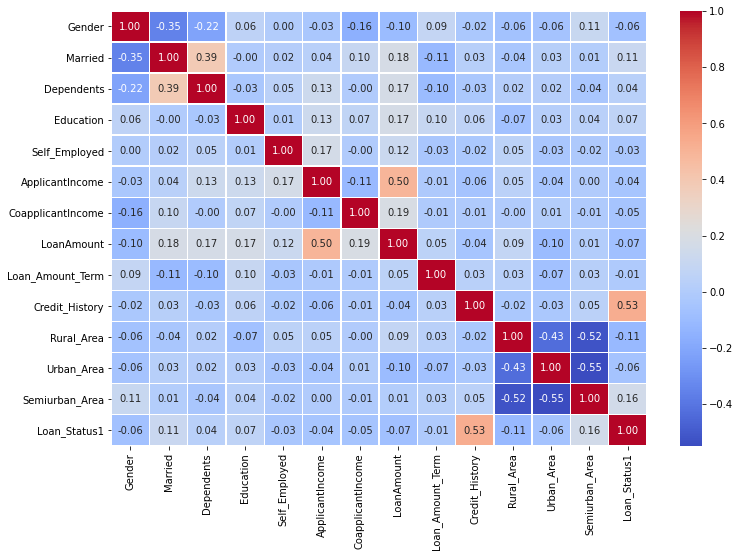

In [58]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(df_CM_train.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

## <a id='16'> 13.Dependents </a>
* How is the Dependents Distribution ?
* How much is the per capita income ?

In [59]:
df_Dependents=df_CM_train['Dependents'].value_counts().to_frame().reset_index().rename(columns={'index':'Dependents','Dependents':'count'})

fig = go.Figure(go.Bar(
    x=df_Dependents['Dependents'],y=df_Dependents['count'],
    marker={'color': df_Dependents['count'], 
    'colorscale': 'Viridis'},  
    text=df_Dependents['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Dependents Distribution',xaxis_title="Dependents",yaxis_title="Count ",title_x=0.5)
fig.show()

In [60]:
df_M_and_G_and_E=df_CM_train.groupby(by =['Dependents','Loan_Status1'])['Education'].count().to_frame().reset_index().rename(columns={'Dependents':'Dependents','Loan_Status':'Loan_Status','Education':'count'})
df_M_and_G_and_E['Loan_Status1']=df_M_and_G_and_E['Loan_Status1'].astype('category')

fig = px.bar(df_M_and_G_and_E, x="Dependents", y="count", color="Loan_Status1", barmode="group",
             
             )
fig.update_layout(title_text='Loan Status With Dependents ',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.update_layout(xaxis_title="Dependents",yaxis_title="Count")
fig.show()

In [61]:
df_M_and_G=df_CM_train.groupby(by =['Dependents'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Dependents':'Dependents','ApplicantIncome':'Mean'})
df_M_and_G["deneme"]=[1,2,3,4]
df_M_and_G["per_capita_income"]=df_M_and_G['Mean']/df_M_and_G['deneme']

fig = go.Figure(go.Bar(
    x=df_M_and_G['Dependents'],y=df_M_and_G['per_capita_income'],
    marker={'color': df_M_and_G['per_capita_income'], 
    'colorscale': 'Viridis'},  
    text=df_M_and_G['per_capita_income'],
    textposition = "outside",
))
fig.update_layout(title_text=' Mean Per Capita Income Distribution With Dependents ',xaxis_title="Dependents",yaxis_title="Income ",title_x=0.5)
fig.show()

In [62]:
df_M_and_G=df_CM_train.groupby(by =['Dependents'])['ApplicantIncome'].median().to_frame().reset_index().rename(columns={'Dependents':'Dependents','ApplicantIncome':'Median'})

fig = go.Figure(go.Bar(
    x=df_M_and_G['Dependents'],y=df_M_and_G['Median'],
    marker={'color': df_M_and_G['Median'], 
    'colorscale': 'Viridis'},  
    text=df_M_and_G['Median'],
    textposition = "outside",
))
fig.update_layout(title_text=' Median Applicant Income Distribution With Dependents ',xaxis_title=" Dependents",yaxis_title="Income ",title_x=0.5)
fig.show()

## <a id='17'> 14.Summary Conclusion </a>

* We will work in an area where men are dominant.

* More than half of the people are married

* Education rate in people 80%

* Self Employed rate in people 14%

* Min Income =150

* Max Income =81k

* Mean Income =5350

* 40 percent of homes are in semi-urban areas

* 31 percent of homes are in urban areas

* 29 percent of homes are in rural areas

* 85 percent of accepted applications have a positive credit history

* Rate of accepted applications 70 meaning that the data set is unbalanced

